In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monthly_milk_production.csv', parse_dates=True, index_col="Date")
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [3]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [4]:
df.columns

Index(['Production'], dtype='object')

<AxesSubplot:xlabel='Date'>

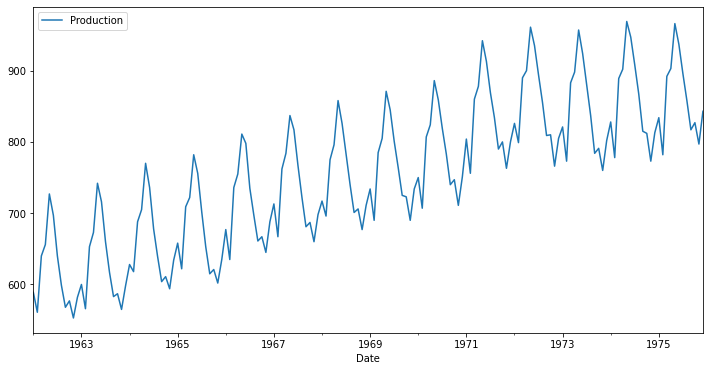

In [5]:
df.plot(figsize=(12,6))

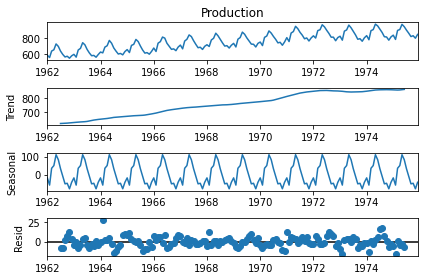

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot();

In [ ]:
len(df)

In [7]:
train=df.iloc[:156]
test=df.iloc[156:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [9]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [10]:
#Created a generator to train the model-to give the value of X(input) and y (the predicted output)
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
X.flatten(),y, generator[0]

(array([0.08653846, 0.01923077, 0.20913462, 0.24759615, 0.41826923,
        0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
        0.        , 0.06971154]),
 array([[0.11298077]]),
 (array([[[0.08653846],
          [0.01923077],
          [0.20913462],
          [0.24759615],
          [0.41826923],
          [0.34615385],
          [0.20913462],
          [0.11057692],
          [0.03605769],
          [0.05769231],
          [0.        ],
          [0.06971154]]]),
  array([[0.11298077]])))

In [13]:
X.shape
#There are 1 row, 12 inputs, 1 input feature

(1, 12, 1)

In [14]:
generator.data

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
#define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(generator, epochs=50)

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.0617
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 5/50
144/144 [==============================] - ETA: 0s - loss: 0.007 - 0s 2ms/step - loss: 0.0077
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 8/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 11/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 12/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0053
E

In [18]:
loss_per_epoch = model.history.history['loss']
loss_per_epoch

[0.061652522534132004,
 0.021936722099781036,
 0.016190670430660248,
 0.012650332413613796,
 0.007689239457249641,
 0.023464318364858627,
 0.009737588465213776,
 0.0062176017090678215,
 0.008334922604262829,
 0.004956437274813652,
 0.004251529462635517,
 0.0053058527410030365,
 0.005285792518407106,
 0.004087698180228472,
 0.004322163760662079,
 0.003730291733518243,
 0.0034220165107399225,
 0.0041618975810706615,
 0.0035192067734897137,
 0.003244068007916212,
 0.0035727289505302906,
 0.003246986074373126,
 0.0037279746029525995,
 0.003203778760507703,
 0.003707112045958638,
 0.003011756343767047,
 0.0032111601904034615,
 0.0029426789842545986,
 0.0029438799247145653,
 0.0027256421744823456,
 0.0030716853216290474,
 0.0026106585282832384,
 0.002384057268500328,
 0.002508623292669654,
 0.002500298200175166,
 0.002753070555627346,
 0.0034318966791033745,
 0.003224817104637623,
 0.0029704412445425987,
 0.003377275075763464,
 0.0024499495048075914,
 0.002108257031068206,
 0.002756019355729

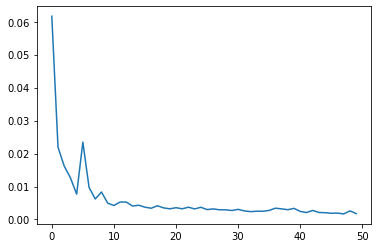

In [19]:
plt.plot(loss_per_epoch)

In [20]:
last_train_batch = scaled_train[-12:]
last_train_batch=last_train_batch.reshape((1, n_input, n_features))
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [21]:
model.predict(last_train_batch)

array([[0.6352411]], dtype=float32)

In [22]:
scaled_test[0]

array([0.67548077])

In [34]:
test_predictions=[]

first_eval_batch = scaled_train[-n_input:]
current_batch=first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
    
    #get the prediction value for the first batch
    current_pred=model.predict(current_batch)[0]
    
    #append the predictions into the array
    test_predictions.append(current_pred)
    
    #use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

test_predictions

[array([0.6352411], dtype=float32),
 array([0.5927874], dtype=float32),
 array([0.74698], dtype=float32),
 array([0.79403955], dtype=float32),
 array([0.8697429], dtype=float32),
 array([0.8621914], dtype=float32),
 array([0.8128726], dtype=float32),
 array([0.7488011], dtype=float32),
 array([0.64457065], dtype=float32),
 array([0.6162859], dtype=float32),
 array([0.5471261], dtype=float32),
 array([0.5828019], dtype=float32)]

In [40]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,817.260294
1975-02-01,782,799.599552
1975-03-01,892,863.743685
1975-04-01,903,883.320452
1975-05-01,966,914.813034


In [38]:
true_predictions = scaler.inverse_transform(test_predictions)

In [39]:
test['Predictions']=true_predictions

<ipython-input-39-37e263692d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


<AxesSubplot:xlabel='Date'>

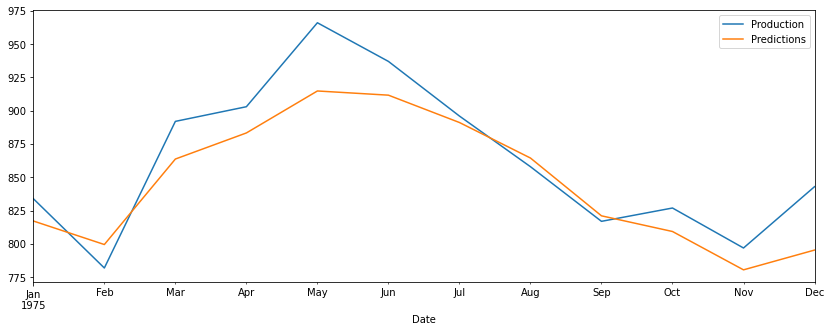

In [41]:
test.plot(figsize=(14,5))

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rsme = sqrt(mean_squared_error(test['Production'], test['Predictions']))
print(rsme)


25.756987988532295


In [47]:
sqrt(train.mean())

27.320392496335884